In [4]:
import datashader as ds, colorcet as cc
df = pd.read_csv("/home/muhoss/git_repos/2023-Course_Data_Visualization_Master_Digital_Sciences/code/nyc_taxi.csv")
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_x,pickup_y,RateCodeID,store_and_fwd_flag,dropoff_x,dropoff_y,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,10064589,2,2015-01-01 20:20:57,2015-01-01 20:30:39,1,4.02,-8.232723e+06,4.979400e+06,1,N,-8.235438e+06,4.973928e+06,1,13.5,0.5,0.5,1.50,0.0,0.3,16.30
1,8451911,1,2015-01-15 12:35:56,2015-01-15 12:52:29,1,2.40,-8.233768e+06,4.979199e+06,1,N,-8.236276e+06,4.974675e+06,1,12.0,0.0,0.5,2.55,0.0,0.3,15.35
2,1030538,1,2015-01-02 22:02:55,2015-01-02 22:09:17,1,0.90,-8.236912e+06,4.972484e+06,1,N,-8.235815e+06,4.972018e+06,1,5.7,0.5,0.5,1.40,0.0,0.0,8.40
3,8061903,2,2015-01-19 09:47:07,2015-01-19 09:50:40,2,1.01,-8.232874e+06,4.979104e+06,1,N,-8.231489e+06,4.979778e+06,2,5.0,0.0,0.5,0.00,0.0,0.3,5.80
4,6446658,2,2015-01-09 17:32:26,2015-01-09 17:52:10,5,2.73,-8.236896e+06,4.976339e+06,1,N,-8.235296e+06,4.972574e+06,1,14.0,1.0,0.5,3.00,0.0,0.3,18.80


In [5]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
p = figure(title="Dropoffs",
           x_axis_label="dropoff_x",
           y_axis_label="dropoff_x")
cds = ColumnDataSource(df)
p.circle(source=cds, x="dropoff_x", y="dropoff_y", legend_label="Random dots", size=5)

GlyphRenderer(id='1106', ...)

In [7]:
show(p)

Opening in existing browser session.


### 10-million-point Datashaded Plots: Auto-ranging, but Limited Dynamic Range
We can make more meaningful visualizations with Datashader

![Datashader Process](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRUJZ5AEpSPzwT8WR5CCY6Et1aSVprC1X1ciGW-6bspv_yUFq-7)

The steps involved in datashading are:
1. create a Canvas object with the shape of the eventual plot (i.e. having one storage bin for collecting points, per final pixel)
2. aggregating all points into that set of bins, incrementally counting them
3. mapping the resulting counts into a visible color from a specified range to make an image

In [13]:
import pandas as pd
from datashader import transfer_functions as tf

In [16]:
plot_width  = int(990)
plot_height = int(plot_width//1.2)

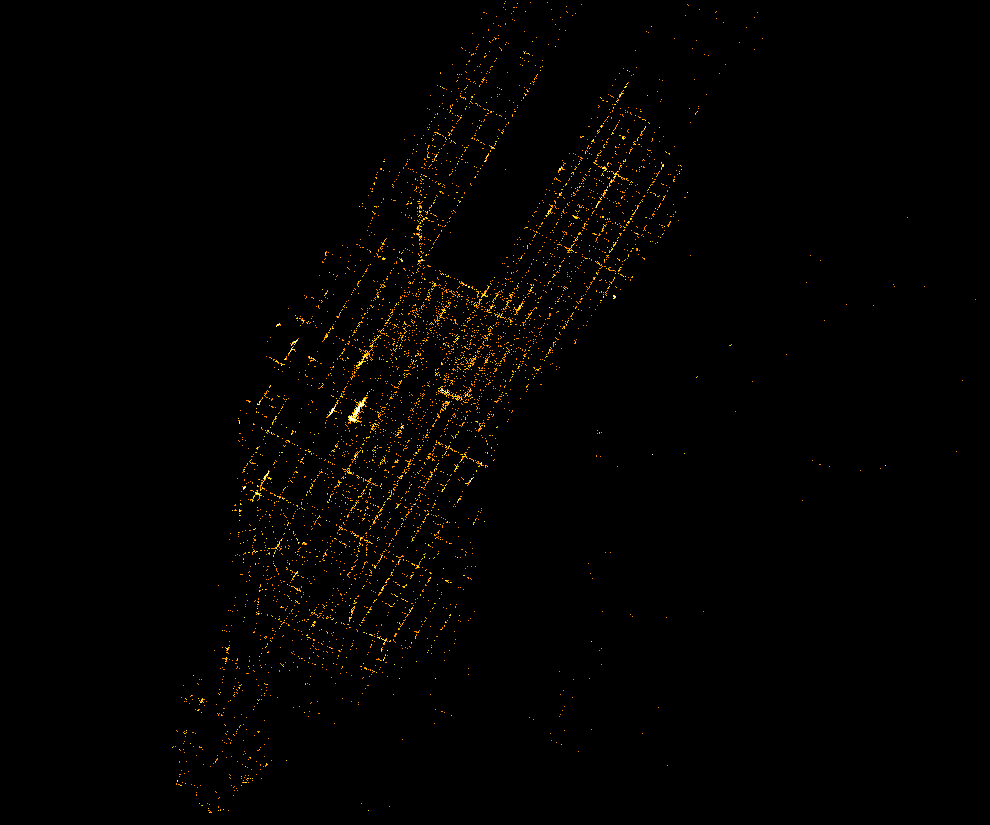

In [17]:
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
agg = cvs.points(df, 'dropoff_x', 'dropoff_y')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")